In [ ]:
import pandas as pd
mobile = pd.read_csv('Data/mobile_cleaned.csv')
mobile.drop(columns='time',inplace=True)
# mobile.drop_duplicates(inplace=True).reset_index(drop=True)
mobile.reset_index(drop=True, inplace=True)

print(mobile.mobile_strength.min())
print(mobile.mobile_strength.max())
# we have max and min
# we set a range interval based score for the strength
mobile.mobile_strength = mobile.mobile_strength.div(10)
mobile

In [ ]:
! pip install matplotlib numpy pandas seaborn scikit-learn ipython kneed

In [ ]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score

In [ ]:
features = mobile.values.tolist()

In [ ]:
features

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
scaled_features

In [101]:
import numpy as np
kmeans = KMeans(n_clusters=50)
dbscan = DBSCAN(eps=0.003)
features = np.array(features)
kmeans.fit(features)
dbscan.fit(features)
kmeans_silhouette = silhouette_score(
    scaled_features, kmeans.labels_
)
dbscan_silhouette = silhouette_score(
    scaled_features, dbscan.labels_
)

c:\Users\mohan\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
kmeans_silhouette

In [ ]:
dbscan_silhouette

In [ ]:
test = scaler.fit_transform([[40.1126004, -88.2184671, 3.8]])

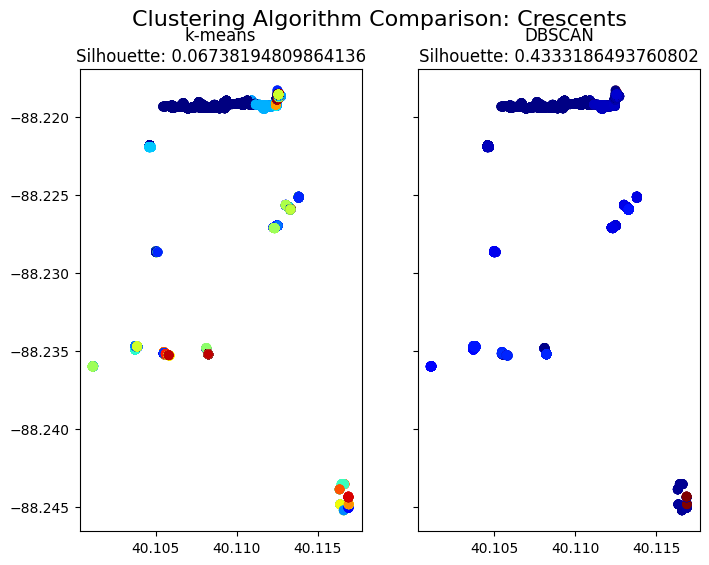

In [102]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors


numbers = np.arange(1, 501)

cmap = plt.cm.jet

norm = plt.Normalize(vmin=numbers.min(), vmax=numbers.max())

colors = [cmap(norm(num)) for num in numbers]

hex_colors = [mcolors.to_hex(color) for color in colors]

fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(8, 6), sharex=True, sharey=True
)
fig.suptitle(f"Clustering Algorithm Comparison: Crescents", fontsize=16)

# The k-means plot
km_colors = [hex_colors[label*10] for label in kmeans.labels_]
ax1.scatter(features[:, 0], features[:, 1], c=km_colors)
ax1.set_title(
    f"k-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12}
)

# The dbscan plot
db_colors = [hex_colors[label] for label in dbscan.labels_]
ax2.scatter(features[:, 0], features[:, 1], c=db_colors)
ax2.set_title(
    f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12}
)
plt.show()